In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('Qral Pinethase Sales Launch Strategy Data Set 2025.xlsx')

print("=== DATA SHAPE ===")
display(f"Shape: {df.shape}")
print(f"\n=== COLUMNS ===")
print(df.columns.tolist())

#print(df_clean['Primary Spec'].value_counts())

=== DATA SHAPE ===


'Shape: (3990, 13)'


=== COLUMNS ===
['NPI', 'First Name', 'Last Name', 'Primary Spec', 'Med School', 'Graduation Year', 'Medical Credential', 'Organization ID', 'Organization Name', 'Organization City', 'Organization State', 'Competitor Vials Prescribed Per Year', 'Pancreatic Cancer Patients Treated Per Year']


In [ ]:
# 1. Data types
print("=== DATA TYPES ===")
print(df.dtypes)


=== DATA TYPES ===
NPI                                              int64
First Name                                      object
Last Name                                       object
Primary Spec                                    object
Med School                                      object
Graduation Year                                float64
Medical Credential                              object
Organization ID                                float64
Organization Name                               object
Organization City                               object
Organization State                              object
Competitor Vials Prescribed Per Year             int64
Pancreatic Cancer Patients Treated Per Year      int64
dtype: object


In [30]:
# 2. Descriptive statistics
print("=== DESCRIPTIVE STATISTICS ===")
display(df.head())


=== DESCRIPTIVE STATISTICS ===


,NPI,First Name,Last Name,Primary Spec,Med School,Graduation Year,Medical Credential,Organization ID,Organization Name,Organization City,Organization State,Competitor Vials Prescribed Per Year,Pancreatic Cancer Patients Treated Per Year
0,1003991035,FRANK,FOSSELLA,MEDICAL ONCOLOGY,OTHER,1982.0,NaN,7.911801e+09,PHYSICIANS REFERRAL SERVICE,HOUSTON,TX,360,10
1,1073698767,ELIZABETH,POPLIN,MEDICAL ONCOLOGY,UNIVERSITY OF MASSACHUSETTS MEDICAL SCHOOL,1976.0,MD,NaN,NaN,NaN,NJ,360,10
2,1235106923,PAUL,ENGSTROM,MEDICAL ONCOLOGY,UNIVERSITY OF MINNESOTA MEDICAL SCHOOL,1962.0,MD,8.123290e+09,"FOX CHASE CANCER CENTER MEDICAL GROUP, INC",PHILADELPHIA,PA,360,10
3,1265478325,KARL,SCHULTHEISS,MEDICAL ONCOLOGY,OTHER,1986.0,NaN,3.476462e+09,SAINT ALPHONSUS REGIONAL MEDICAL CENTER INC,NaN,ID,360,10
4,1437156197,CHARLES,MONTGOMERY,MEDICAL ONCOLOGY,UNIVERSITY OF MISSISSIPPI SCHOOL OF MEDICINE,1974.0,MD,NaN,NaN,NaN,MS,360,10



=== PATIENTS TREATED VS VIALS PRESCRIBED ===


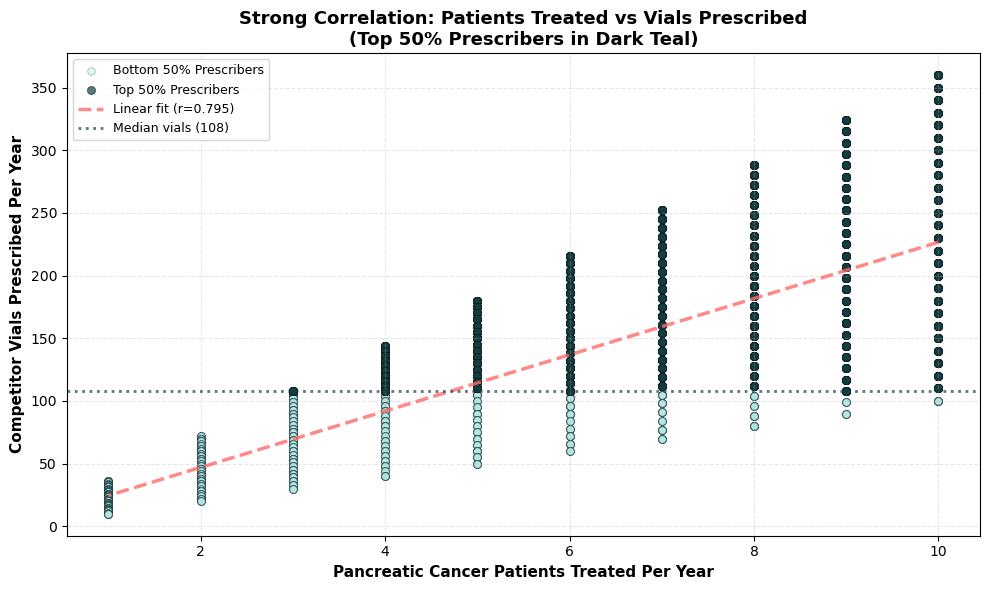

Correlation coefficient: 0.795
R-squared: 0.632 (63.2% of variance explained)
P-value: 0.00e+00 (highly significant)
Linear relationship: Vials = 22.46 × Patients + 2.08

Top 50% threshold: 108 vials/year
Top 50% count: 2,056 physicians


In [31]:
# Scatter plot: Patients Treated vs Vials Prescribed
print("\n=== PATIENTS TREATED VS VIALS PRESCRIBED ===")
plt.figure(figsize=(10, 6))

# Identify top 50% prescribers
vials_median = df['Competitor Vials Prescribed Per Year'].median()
is_top_50 = df['Competitor Vials Prescribed Per Year'] >= vials_median

# Plot bottom 50% (lighter color)
plt.scatter(df.loc[~is_top_50, 'Pancreatic Cancer Patients Treated Per Year'], 
           df.loc[~is_top_50, 'Competitor Vials Prescribed Per Year'],
           alpha=0.4, s=30, color='#B8E6E3', edgecolors='#173C40', linewidth=0.5,
           label='Bottom 50% Prescribers')

# Plot top 50% (deeper color)
plt.scatter(df.loc[is_top_50, 'Pancreatic Cancer Patients Treated Per Year'], 
           df.loc[is_top_50, 'Competitor Vials Prescribed Per Year'],
           alpha=0.7, s=35, color='#173C40', edgecolors='#0A1E20', linewidth=0.5,
           label='Top 50% Prescribers')

# Add regression line
from scipy import stats
mask = df[['Pancreatic Cancer Patients Treated Per Year', 'Competitor Vials Prescribed Per Year']].notna().all(axis=1)
x = df.loc[mask, 'Pancreatic Cancer Patients Treated Per Year']
y = df.loc[mask, 'Competitor Vials Prescribed Per Year']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='#FF6B6B', linewidth=2.5, linestyle='--', alpha=0.8, label=f'Linear fit (r={r_value:.3f})')

# Add horizontal line at median
plt.axhline(y=vials_median, color='#173C40', linestyle=':', linewidth=2, alpha=0.7, label=f'Median vials ({vials_median:.0f})')

# Labels and title
plt.xlabel('Pancreatic Cancer Patients Treated Per Year', fontweight='bold', fontsize=11)
plt.ylabel('Competitor Vials Prescribed Per Year', fontweight='bold', fontsize=11)
plt.title('Strong Correlation: Patients Treated vs Vials Prescribed\n(Top 50% Prescribers in Dark Teal)', 
         fontweight='bold', fontsize=13)
plt.legend(loc='upper left', fontsize=9)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"Correlation coefficient: {r_value:.3f}")
print(f"R-squared: {r_value**2:.3f} ({r_value**2*100:.1f}% of variance explained)")
print(f"P-value: {p_value:.2e} (highly significant)")
print(f"Linear relationship: Vials = {slope:.2f} × Patients + {intercept:.2f}")
print(f"\nTop 50% threshold: {vials_median:.0f} vials/year")
print(f"Top 50% count: {is_top_50.sum():,} physicians")

In [32]:
# 3. Show null values
print("=== NULL VALUES ANALYSIS ===")
null_counts = df.isnull().sum()
null_pct = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({
    'Null_Count': null_counts,
    'Null_Percentage': null_pct
}).sort_values('Null_Count', ascending=False)

print(null_summary[null_summary['Null_Count'] > 0])
print(f"\nTotal nulls: {df.isnull().sum().sum()}")


=== NULL VALUES ANALYSIS ===
                    Null_Count  Null_Percentage
Medical Credential        2366        59.298246
Organization City         1650        41.353383
Organization Name         1227        30.751880
Organization ID            914        22.907268
Organization State         294         7.368421
Graduation Year             17         0.426065

Total nulls: 6468


In [33]:
# 4. Clean data - drop rows with no Organization State and Radiation Oncologists
print("=== DATA CLEANING ===")
print(f"Initial rows: {len(df)}")

# Remove duplicates by NPI
df_clean = df.drop_duplicates(subset=['NPI'], keep='first')
duplicates_removed = len(df) - len(df_clean)
print(f"After removing duplicates: {len(df_clean)} rows (removed {duplicates_removed})")

# Drop rows with null Organization State
before_state_drop = len(df_clean)
df_clean = df_clean.dropna(subset=['Organization State'])
state_nulls_removed = before_state_drop - len(df_clean)
print(f"After dropping null states: {len(df_clean)} rows (removed {state_nulls_removed})")

# Remove Radiation Oncologists
before_rad_onc = len(df_clean)
rad_onc_count = (df_clean['Primary Spec'] == 'RADIATION ONCOLOGY').sum()
df_clean = df_clean[df_clean['Primary Spec'] != 'RADIATION ONCOLOGY']
print(f"After removing Radiation Oncologists: {len(df_clean)} rows (removed {rad_onc_count})")

print(f"\nTotal rows removed: {len(df) - len(df_clean)}")
print(f"Final shape: {df_clean.shape}")


=== DATA CLEANING ===
Initial rows: 3990
After removing duplicates: 3990 rows (removed 0)
After dropping null states: 3696 rows (removed 294)
After removing Radiation Oncologists: 3637 rows (removed 59)

Total rows removed: 353
Final shape: (3637, 13)


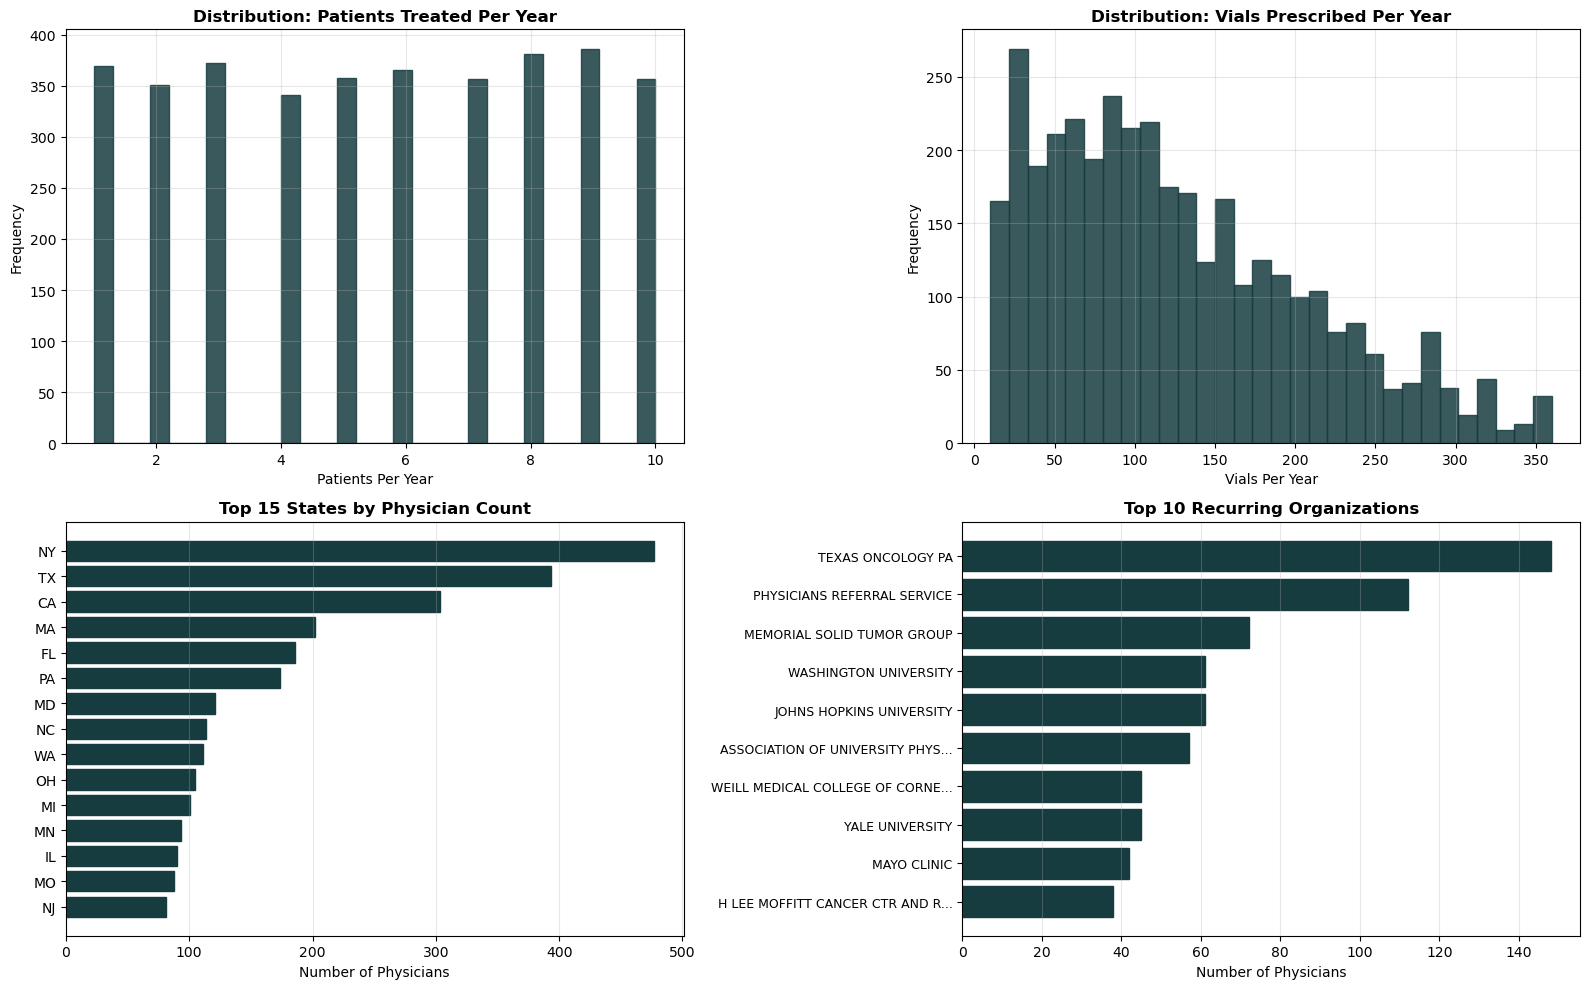

In [34]:
# 5. Visualizations - Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution of patients treated per year
axes[0,0].hist(df_clean['Pancreatic Cancer Patients Treated Per Year'], bins=30, alpha=0.85, color='#173C40', edgecolor='#173C40')
axes[0,0].set_title('Distribution: Patients Treated Per Year', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Patients Per Year')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(alpha=0.3)

# Distribution of vials prescribed per year
axes[0,1].hist(df_clean['Competitor Vials Prescribed Per Year'], bins=30, alpha=0.85, color='#173C40', edgecolor='#173C40')
axes[0,1].set_title('Distribution: Vials Prescribed Per Year', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Vials Per Year')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(alpha=0.3)

# Top 15 states by physician count (most to least)
state_counts = df_clean['Organization State'].value_counts().head(15)
axes[1,0].barh(range(len(state_counts)), state_counts.values, color='#173C40', edgecolor='#173C40')
axes[1,0].set_yticks(range(len(state_counts)))
axes[1,0].set_yticklabels(state_counts.index)
axes[1,0].invert_yaxis()
axes[1,0].set_title('Top 15 States by Physician Count', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Number of Physicians')
axes[1,0].grid(alpha=0.3, axis='x')

# Top recurring organization names
org_counts = df_clean['Organization Name'].value_counts().head(10)
axes[1,1].barh(range(len(org_counts)), org_counts.values, color='#173C40', edgecolor='#173C40')
axes[1,1].set_yticks(range(len(org_counts)))
axes[1,1].set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in org_counts.index], fontsize=9)
axes[1,1].invert_yaxis()
axes[1,1].set_title('Top 10 Recurring Organizations', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Number of Physicians')
axes[1,1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


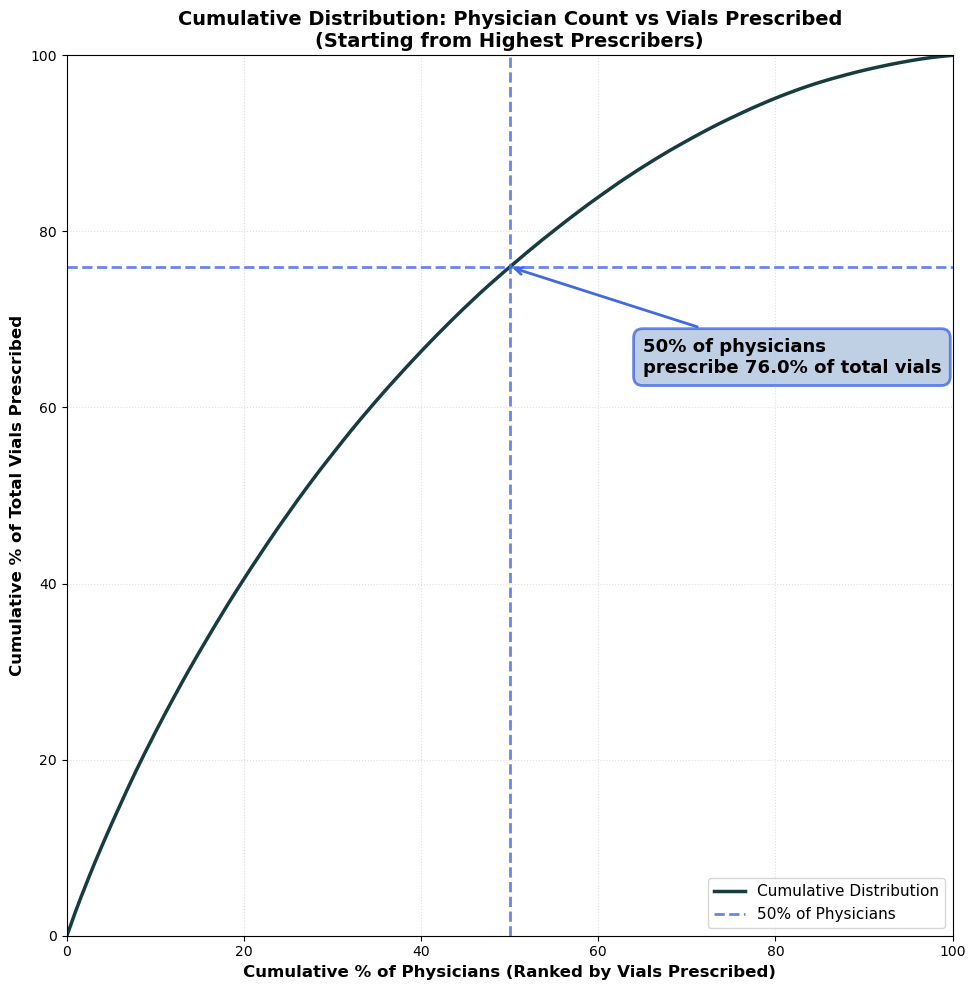


KEY FINDING: Top 50% of physicians prescribe 76.0% of total vials
Total vials prescribed: 457,347
Total physicians: 3,637
Average vials per physician: 125.7
Top 50% physicians: 1,818
Vials by top 50%: 347,459


In [35]:
# 6. Cumulative Vials Prescribed vs Physician Count
# Sort by vials prescribed (highest first)
df_sorted = df_clean.sort_values('Competitor Vials Prescribed Per Year', ascending=False).reset_index(drop=True)

# Calculate cumulative metrics
total_vials = df_sorted['Competitor Vials Prescribed Per Year'].sum()
df_sorted['cumulative_vials'] = df_sorted['Competitor Vials Prescribed Per Year'].cumsum()
df_sorted['cumulative_vials_pct'] = (df_sorted['cumulative_vials'] / total_vials) * 100
df_sorted['physician_pct'] = ((df_sorted.index + 1) / len(df_sorted)) * 100

# Find 50% physician mark
physician_50_idx = int(len(df_sorted) * 0.5)
vials_at_50_pct = df_sorted.iloc[physician_50_idx]['cumulative_vials_pct']

# Visualization
plt.figure(figsize=(10, 10))
plt.plot(df_sorted['physician_pct'], df_sorted['cumulative_vials_pct'], linewidth=2.5, color='#173C40', label='Cumulative Distribution')
plt.axvline(x=50, color='#4169E1', linestyle='--', linewidth=2, alpha=0.8, label='50% of Physicians')
plt.axhline(y=vials_at_50_pct, color='#4169E1', linestyle='--', linewidth=2, alpha=0.8)

# Annotation
plt.annotate(f'50% of physicians\nprescribe {vials_at_50_pct:.1f}% of total vials', 
             xy=(50, vials_at_50_pct), xytext=(65, vials_at_50_pct-12),
             arrowprops=dict(arrowstyle='->', color='#4169E1', lw=2),
             fontsize=13, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#B0C4DE", edgecolor='#4169E1', linewidth=2, alpha=0.8))

plt.xlabel('Cumulative % of Physicians (Ranked by Vials Prescribed)', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative % of Total Vials Prescribed', fontsize=12, fontweight='bold')
plt.title('Cumulative Distribution: Physician Count vs Vials Prescribed\n(Starting from Highest Prescribers)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle=':')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()

# Key statistics
print(f"\n{'='*60}")
print(f"KEY FINDING: Top 50% of physicians prescribe {vials_at_50_pct:.1f}% of total vials")
print(f"{'='*60}")
print(f"Total vials prescribed: {total_vials:,}")
print(f"Total physicians: {len(df_sorted):,}")
print(f"Average vials per physician: {total_vials/len(df_sorted):.1f}")
print(f"Top 50% physicians: {physician_50_idx:,}")
print(f"Vials by top 50%: {df_sorted.iloc[physician_50_idx]['cumulative_vials']:,.0f}")


In [36]:
# Create df_target - Top 50% of prescribing physicians
df_target = df_sorted.iloc[:physician_50_idx].copy()

print("=== TARGET PHYSICIAN COHORT (Top 50% Prescribers) ===")
print(f"Total physicians in target: {len(df_target):,}")
print(f"Total vials by target: {df_target['Competitor Vials Prescribed Per Year'].sum():,}")
print(f"% of total vials: {(df_target['Competitor Vials Prescribed Per Year'].sum() / total_vials * 100):.1f}%")
print(f"Avg vials per physician: {df_target['Competitor Vials Prescribed Per Year'].mean():.1f}")
print(f"Vials range: {df_target['Competitor Vials Prescribed Per Year'].min()} - {df_target['Competitor Vials Prescribed Per Year'].max()}")
print(f"\nTop 5 states in target cohort:")
print(df_target['Organization State'].value_counts().head())


=== TARGET PHYSICIAN COHORT (Top 50% Prescribers) ===
Total physicians in target: 1,818
Total vials by target: 347,351
% of total vials: 75.9%
Avg vials per physician: 191.1
Vials range: 108 - 360

Top 5 states in target cohort:
Organization State
NY    213
TX    200
CA    146
MA    104
FL     96
Name: count, dtype: int64


=== STATE QUARTILE DEFINITIONS (by Total Vials Prescribed) ===

Q1_High: 14 states
  States: CA, FL, IL, MA, MD, MI, MN, NC, NJ, NY...
  Total vials: 322,243

Q2_Mid-High: 13 states
  States: AL, AZ, CO, CT, GA, IA, IN, MO, OK, OR...
  Total vials: 89,025

Q3_Mid-Low: 13 states
  States: AK, ID, KS, KY, LA, ME, MS, NE, NH, NM...
  Total vials: 37,727

Q4_Low: 14 states
  States: AR, DC, DE, GU, HI, MT, ND, PR, RI, SD...
  Total vials: 8,352


=== MED SCHOOL ANALYSIS ===
Top 10 Med Schools by Total Vials:
                                                    Total_Vials   Avg_Vials  \
Med School                                                                    
OTHER                                                    175086  127.986842   
HARVARD MEDICAL SCHOOL                                    10628  149.690141   
JOHNS HOPKINS UNIVERSITY SCHOOL OF MEDICINE                6682  133.640000   
UNIVERSITY OF PENNSYLVANIA SCHOOL OF MEDICINE              5977  124.520833   
BAYLOR COLLEGE O

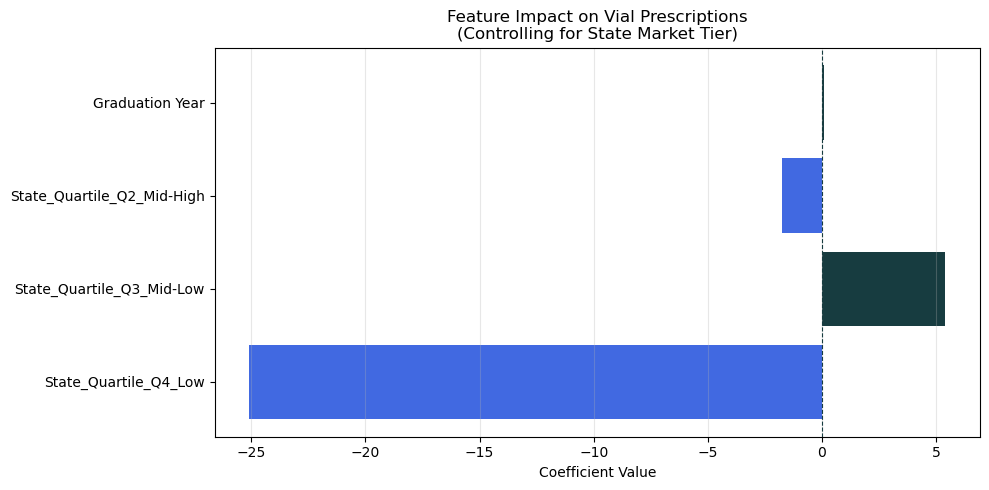

In [37]:
# Multiple Linear Regression - Improved Model with State Quartiles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Create state quartiles based on total vials prescribed by state
state_vials = df_clean.groupby('Organization State')['Competitor Vials Prescribed Per Year'].sum().sort_values(ascending=False)
state_quartiles = pd.qcut(state_vials.rank(method='first'), q=4, labels=['Q4_Low', 'Q3_Mid-Low', 'Q2_Mid-High', 'Q1_High'])
state_quartile_map = state_quartiles.to_dict()

print("=== STATE QUARTILE DEFINITIONS (by Total Vials Prescribed) ===")
for q in ['Q1_High', 'Q2_Mid-High', 'Q3_Mid-Low', 'Q4_Low']:
    states_in_q = [s for s, qt in state_quartile_map.items() if qt == q]
    total_vials_q = state_vials[states_in_q].sum()
    print(f"\n{q}: {len(states_in_q)} states")
    print(f"  States: {', '.join(sorted(states_in_q)[:10])}{'...' if len(states_in_q) > 10 else ''}")
    print(f"  Total vials: {total_vials_q:,}")

# Analyze Med School Impact
print("\n\n=== MED SCHOOL ANALYSIS ===")
school_vials = df_clean.groupby('Med School')['Competitor Vials Prescribed Per Year'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
school_vials.columns = ['Total_Vials', 'Avg_Vials', 'Physician_Count']
print("Top 10 Med Schools by Total Vials:")
print(school_vials.head(10))

# Test if med school matters (ANOVA)
from scipy import stats
top_schools = school_vials.head(10).index
school_groups = [df_clean[df_clean['Med School']==school]['Competitor Vials Prescribed Per Year'].values 
                 for school in top_schools if len(df_clean[df_clean['Med School']==school]) > 5]
if len(school_groups) > 1:
    f_stat, p_value = stats.f_oneway(*school_groups)
    print(f"\nANOVA Test (Does med school affect vials?): F={f_stat:.2f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("✓ Med school DOES significantly impact prescribing (p<0.05)")
    else:
        print("✗ Med school does NOT significantly impact prescribing (p≥0.05)")

# Analyze Organization Impact  
print("\n\n=== ORGANIZATION ANALYSIS ===")
org_vials = df_clean.groupby('Organization Name')['Competitor Vials Prescribed Per Year'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
org_vials.columns = ['Total_Vials', 'Avg_Vials', 'Physician_Count']
print("Top 10 Organizations by Total Vials:")
print(org_vials.head(10))

# Organizations with 5+ physicians
org_with_scale = org_vials[org_vials['Physician_Count'] >= 5].head(10)
print(f"\nTop organizations with 5+ physicians:")
print(org_with_scale)

print(f"\n📊 RECOMMENDATION:")
print(f"State Quartiles: Already using ✓ ({len(state_quartile_map)} states grouped into 4 tiers)")
print(f"Med School: {'Consider grouping' if p_value < 0.05 else 'Low impact - skip'} (p={p_value:.3f})")
print(f"Organization: Individual orgs too granular ({org_vials.shape[0]:,} unique) - use state instead")

# Test if State Quartile is redundant with individual vials
print("\n\n=== TESTING STATE QUARTILE REDUNDANCY ===")
df_test = df_clean.copy()
df_test['State_Quartile'] = df_test['Organization State'].map(state_quartile_map)

# Average vials by state quartile
avg_by_quartile = df_test.groupby('State_Quartile')['Competitor Vials Prescribed Per Year'].agg(['mean', 'std', 'min', 'max'])
print("\nAverage Individual Vials by State Quartile:")
print(avg_by_quartile)

# Key insight: Within-state variation
print("\n🔍 KEY INSIGHT:")
for q in ['Q1_High', 'Q2_Mid-High', 'Q3_Mid-Low', 'Q4_Low']:
    q_data = df_test[df_test['State_Quartile']==q]['Competitor Vials Prescribed Per Year']
    if len(q_data) > 0:
        cv = q_data.std() / q_data.mean()  # Coefficient of variation
        print(f"{q}: Mean={q_data.mean():.1f}, StdDev={q_data.std():.1f}, CV={cv:.2f}")
        print(f"  → Within-state variation is {cv:.0%} of the mean")

# Correlation between state quartile and individual vials
quartile_numeric = df_test['State_Quartile'].map({'Q4_Low': 1, 'Q3_Mid-Low': 2, 'Q2_Mid-High': 3, 'Q1_High': 4})
corr_state_vials = quartile_numeric.corr(df_test['Competitor Vials Prescribed Per Year'])
print(f"\n📊 Correlation (State Quartile ↔ Individual Vials): r={corr_state_vials:.3f}")

if abs(corr_state_vials) < 0.3:
    print("✓ State Quartile is NOT redundant (low correlation) - captures market context")
    print("  State = market opportunity, Vials = individual performance")
elif abs(corr_state_vials) < 0.6:
    print("⚠️ State Quartile has moderate correlation - some redundancy but still useful")
else:
    print("✗ State Quartile is highly redundant - consider removing")

# Prepare regression data
df_reg = df_clean.copy()
df_reg['State_Quartile'] = df_reg['Organization State'].map(state_quartile_map)
df_reg = df_reg.dropna(subset=['Graduation Year'])

# Create dummy variables for state quartiles only
df_reg = pd.get_dummies(df_reg, columns=['State_Quartile'], drop_first=True)

# Select features (excluding patients treated to check separately)
feature_cols = ['Graduation Year'] + [col for col in df_reg.columns if col.startswith('State_Quartile_')]
X = df_reg[feature_cols]
y = df_reg['Competitor Vials Prescribed Per Year']

# Check multicollinearity: Correlation between patients and vials
print(f"\n=== MULTICOLLINEARITY CHECK ===")
corr = df_reg[['Pancreatic Cancer Patients Treated Per Year', 'Competitor Vials Prescribed Per Year']].corr()
print(f"Correlation (Patients vs Vials): {corr.iloc[0,1]:.4f}")
print("Strong correlation (>0.7) indicates multicollinearity - EXCLUDING patients from model\n")

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("=== REGRESSION RESULTS (Without Patients Treated) ===")
print(f"R-squared: {model.score(X, y):.4f}")
print(f"Intercept: {model.intercept_:.2f}\n")
print("Feature Coefficients:")
print(coef_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 5))
plt.barh(range(len(coef_df)), coef_df['Coefficient'].values, 
         color=['#173C40' if x > 0 else '#4169E1' for x in coef_df['Coefficient']])
plt.yticks(range(len(coef_df)), coef_df['Feature'].values)
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Vial Prescriptions\n(Controlling for State Market Tier)')
plt.axvline(x=0, color='#173C40', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


PARETO TIERING RESULTS:
• Top 20% (363 physicians) = Elite tier
• Next 30% (546 physicians) = Priority tier
• Bottom 50% (909 physicians) = Core tier

=== PHYSICIAN POTENTIAL SCORE METHODOLOGY ===
TARGET COHORT: Top 50% of prescribers (1,818 physicians prescribing 76% of vials)

Score Components (0-100 scale - INTUITIVE WEIGHTS):
  • Competitor Vials (50%): Current prescription volume - PRIMARY DRIVER
  • Patient Base (20%): Pancreatic cancer patients treated - CAPACITY
  • Market Tier (30%): State market opportunity (Q1=100, Q2=55, Q3=35, Q4=15) - OPPORTUNITY
  • REMOVED: Graduation Year (had zero correlation with prescription likelihood)
  • Intuitive weighting: 50% current performance, 30% market opportunity, 20% capacity

PARETO-BASED TIERING (80/20 Principle):
  • Tier 1 Elite: Top 20% of physicians by score - HIGHEST PRIORITY
  • Tier 2 Priority: Next 30% of physicians by score - SECONDARY FOCUS
  • Tier 3 Core: Bottom 50% of physicians by score - MONITOR & NURTURE
  • Rationale:

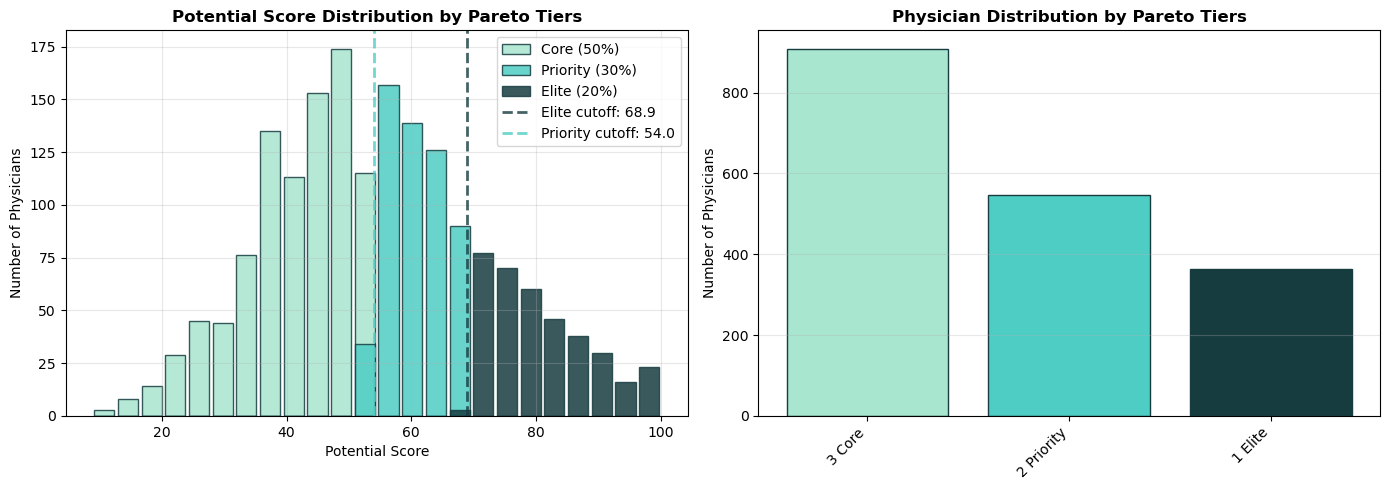

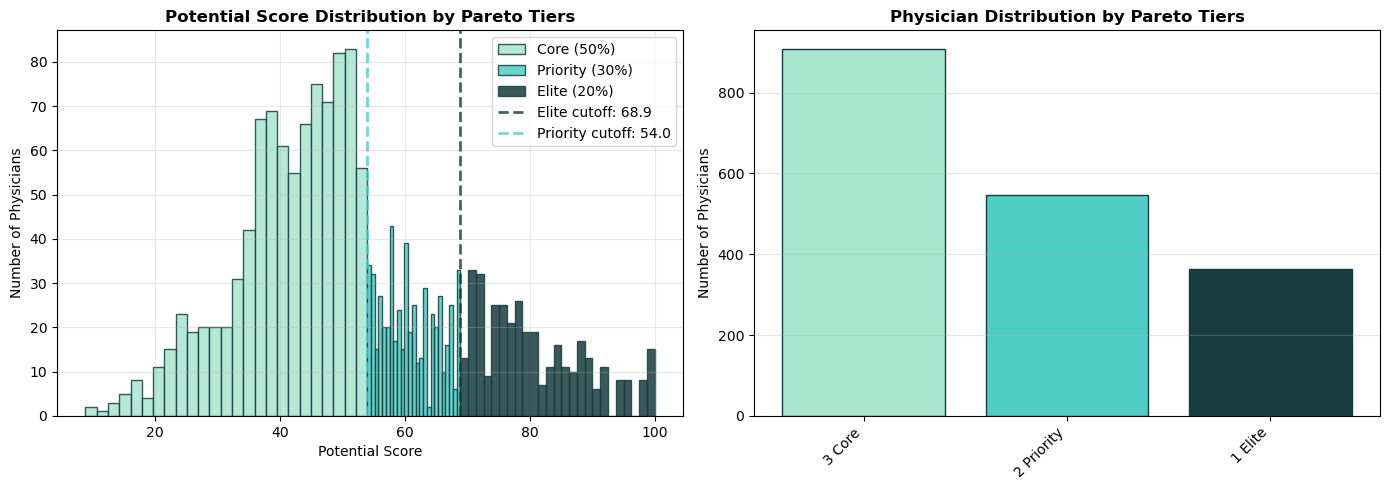


✓ Scored dataset ready: 1818 physicians


In [38]:
# Physician Potential Score - Commercialization Targeting Metric (Top 50% Only)
from sklearn.preprocessing import MinMaxScaler

# Create scoring dataframe from df_target (top 50% prescribers only)
df_score = df_target.copy()
df_score['State_Quartile'] = df_score['Organization State'].map(state_quartile_map)

# Normalize key features (0-100 scale) - normalized within top 50%
scaler = MinMaxScaler(feature_range=(0, 100))

# Component 1: Current Market Activity (70% combined)
df_score['Vials_Score'] = scaler.fit_transform(df_score[['Competitor Vials Prescribed Per Year']])
df_score['Patients_Score'] = scaler.fit_transform(df_score[['Pancreatic Cancer Patients Treated Per Year']])

# Component 2: Market Position (30% weight)
# Higher score for Q1_High states (competitive markets = more opportunity)
# IMPROVED: Market-size proportional scoring (not equal decrements)
state_scores = {'Q1_High': 100, 'Q2_Mid-High': 55, 'Q3_Mid-Low': 35, 'Q4_Low': 15}
df_score['State_Score'] = df_score['State_Quartile'].map(state_scores)

# REMOVED: Graduation Year component (zero correlation with prescription likelihood)
# Redistribute the 10% weight across remaining factors

# Calculate Potential Score (intuitive weighting)
# More intuitive: emphasize current performance (vials) over market opportunity
df_score['Potential_Score'] = (
    df_score['Vials_Score'] * 0.50 +           # 50% - Current prescription volume
    df_score['Patients_Score'] * 0.20 +        # 20% - Patient base size
    df_score['State_Score'] * 0.30             # 30% - Market tier/opportunity
).round(1)

# PARETO-BASED TIERING: Top 20% = Elite, Next 30% = Priority, Bottom 50% = Core
# Sort by score descending to apply Pareto principle correctly
df_score = df_score.sort_values('Potential_Score', ascending=False).reset_index(drop=True)

# Calculate Pareto-based tier cutoffs
total_physicians = len(df_score)
elite_cutoff = int(total_physicians * 0.20)      # Top 20% = Elite
priority_cutoff = int(total_physicians * 0.50)   # Next 30% = Priority (cumulative 50%)

# Apply Pareto tiers
df_score['Tier'] = 'Tier_3_Core'  # Default
df_score.loc[:elite_cutoff-1, 'Tier'] = 'Tier_1_Elite'      # Top 20%
df_score.loc[elite_cutoff:priority_cutoff-1, 'Tier'] = 'Tier_2_Priority'  # Next 30%
# Bottom 50% remains as Tier_3_Core

print(f"PARETO TIERING RESULTS:")
print(f"• Top 20% ({elite_cutoff} physicians) = Elite tier")
print(f"• Next 30% ({priority_cutoff - elite_cutoff} physicians) = Priority tier")
print(f"• Bottom 50% ({total_physicians - priority_cutoff} physicians) = Core tier")
print()

print("=== PHYSICIAN POTENTIAL SCORE METHODOLOGY ===")
print("TARGET COHORT: Top 50% of prescribers (1,818 physicians prescribing 76% of vials)")
print("\nScore Components (0-100 scale - INTUITIVE WEIGHTS):")
print("  • Competitor Vials (50%): Current prescription volume - PRIMARY DRIVER")
print("  • Patient Base (20%): Pancreatic cancer patients treated - CAPACITY")
print("  • Market Tier (30%): State market opportunity (Q1=100, Q2=55, Q3=35, Q4=15) - OPPORTUNITY")
print("  • REMOVED: Graduation Year (had zero correlation with prescription likelihood)")
print("  • Intuitive weighting: 50% current performance, 30% market opportunity, 20% capacity")
print()
print("PARETO-BASED TIERING (80/20 Principle):")
print("  • Tier 1 Elite: Top 20% of physicians by score - HIGHEST PRIORITY")
print("  • Tier 2 Priority: Next 30% of physicians by score - SECONDARY FOCUS")
print("  • Tier 3 Core: Bottom 50% of physicians by score - MONITOR & NURTURE")
print("  • Rationale: Focus sales resources where they'll drive maximum impact\n")

print("=== TIER DEFINITIONS ===")
tier_summary = df_score.groupby('Tier', observed=True).agg({
    'Potential_Score': ['count', 'mean', 'min', 'max'],
    'Competitor Vials Prescribed Per Year': 'sum',
    'Pancreatic Cancer Patients Treated Per Year': 'sum'
}).round(1)
print(tier_summary)

print("\n=== TOP 10 PHYSICIANS BY POTENTIAL SCORE ===")
top_10 = df_score.nlargest(10, 'Potential_Score')[['NPI', 'First Name', 'Last Name', 
                                                     'Organization State', 'State_Quartile',
                                                     'Competitor Vials Prescribed Per Year',
                                                     'Pancreatic Cancer Patients Treated Per Year',
                                                     'Potential_Score', 'Tier']]
print(top_10.to_string(index=False))

# --- FIXED HISTOGRAM PLOTTING SECTION ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define consistent bins across all tiers
bin_edges = np.linspace(df_score['Potential_Score'].min(), 
                        df_score['Potential_Score'].max(), 25)

# Tier and color mapping
colors = ['#A8E6CF', '#4ECDC4', '#173C40']  # Core, Priority, Elite
tier_names = ['Tier_3_Core', 'Tier_2_Priority', 'Tier_1_Elite']
labels = ['Core (50%)', 'Priority (30%)', 'Elite (20%)']

# Plot histograms with consistent bins, same width, and thicker bars
for tier, color, label in zip(tier_names, colors, labels):
    tier_data = df_score[df_score['Tier'] == tier]['Potential_Score']
    axes[0].hist(
        tier_data, 
        bins=bin_edges, 
        alpha=0.85, 
        color=color, 
        edgecolor='#173C40',
        linewidth=1.0, 
        label=label, 
        rwidth=0.85,     # keeps bars thick and uniform
        align='mid'      # aligns bars properly across tiers
    )

# Vertical cutoff lines
elite_min = df_score[df_score['Tier'] == 'Tier_1_Elite']['Potential_Score'].min()
priority_min = df_score[df_score['Tier'] == 'Tier_2_Priority']['Potential_Score'].min()

axes[0].axvline(elite_min, color='#173C40', linestyle='--', linewidth=2, alpha=0.8, label=f'Elite cutoff: {elite_min:.1f}')
axes[0].axvline(priority_min, color='#4ECDC4', linestyle='--', linewidth=2, alpha=0.8, label=f'Priority cutoff: {priority_min:.1f}')

axes[0].set_title('Potential Score Distribution by Pareto Tiers', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Potential Score')
axes[0].set_ylabel('Number of Physicians')
axes[0].legend()
axes[0].grid(alpha=0.3)

# --- Tier breakdown bar chart ---
tier_order = ['Tier_3_Core', 'Tier_2_Priority', 'Tier_1_Elite']
tier_counts = df_score['Tier'].value_counts().reindex(tier_order)
axes[1].bar(range(len(tier_counts)), tier_counts.values, 
            color=colors, edgecolor='#173C40', linewidth=1.0)
axes[1].set_xticks(range(len(tier_counts)))
axes[1].set_xticklabels([label.replace('Tier_', '').replace('_', ' ') for label in tier_counts.index], rotation=45, ha='right')
axes[1].set_title('Physician Distribution by Pareto Tiers', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Number of Physicians')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# Visualize score distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of scores by Pareto tier (overlayed histograms with equal bar width)
colors = ['#A8E6CF', '#4ECDC4', '#173C40']  # Light (Core), Medium (Priority), Dark (Elite)
tier_names = ['Tier_3_Core', 'Tier_2_Priority', 'Tier_1_Elite']
labels = ['Core (50%)', 'Priority (30%)', 'Elite (20%)']

# Use more bins for thinner, more uniform bars
# Plot histograms for each tier with consistent binning
for tier, color, label in zip(tier_names, colors, labels):
    tier_data = df_score[df_score['Tier'] == tier]['Potential_Score']
    axes[0].hist(tier_data, bins=25, alpha=0.85, color=color, edgecolor='#173C40',
                 linewidth=1.0, label=label, rwidth=1.0)

# Add vertical lines showing tier score ranges
elite_min = df_score[df_score['Tier'] == 'Tier_1_Elite']['Potential_Score'].min()
priority_min = df_score[df_score['Tier'] == 'Tier_2_Priority']['Potential_Score'].min()
core_max = df_score[df_score['Tier'] == 'Tier_3_Core']['Potential_Score'].max()

axes[0].axvline(elite_min, color='#173C40', linestyle='--', linewidth=2, alpha=0.8, label=f'Elite cutoff: {elite_min:.1f}')
axes[0].axvline(priority_min, color='#4ECDC4', linestyle='--', linewidth=2, alpha=0.8, label=f'Priority cutoff: {priority_min:.1f}')

axes[0].set_title('Potential Score Distribution by Pareto Tiers', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Potential Score')
axes[0].set_ylabel('Number of Physicians')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Tier breakdown - Sort in reverse order (Core, Priority, Elite) as requested
tier_order = ['Tier_3_Core', 'Tier_2_Priority', 'Tier_1_Elite']
tier_counts = df_score['Tier'].value_counts().reindex(tier_order)
colors = ['#A8E6CF', '#4ECDC4', '#173C40']  # Light green (Core), Medium green (Priority), Dark green (Elite)
axes[1].bar(range(len(tier_counts)), tier_counts.values, color=colors, edgecolor='#173C40')
axes[1].set_xticks(range(len(tier_counts)))
axes[1].set_xticklabels([label.replace('Tier_', '').replace('_', ' ') for label in tier_counts.index], rotation=45, ha='right')
axes[1].set_title('Physician Distribution by Pareto Tiers', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Number of Physicians')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Save scored dataset
df_score_export = df_score[['NPI', 'First Name', 'Last Name', 'Organization State', 'Organization Name',
                            'Competitor Vials Prescribed Per Year', 'Pancreatic Cancer Patients Treated Per Year',
                            'Potential_Score', 'Tier']].sort_values('Potential_Score', ascending=False)
print(f"\n✓ Scored dataset ready: {len(df_score)} physicians")


✓ Physician counts by rep territory:
 Rep_Territory
0     74
1     74
2     74
3     74
4     74
5     74
6     74
7     74
8     74
9     73
10    73
11    73
12    73
13    72
14    72
15    72
16    72
17    72
18    72
19    72
20    72
21    71
22    71
23    71
24    71


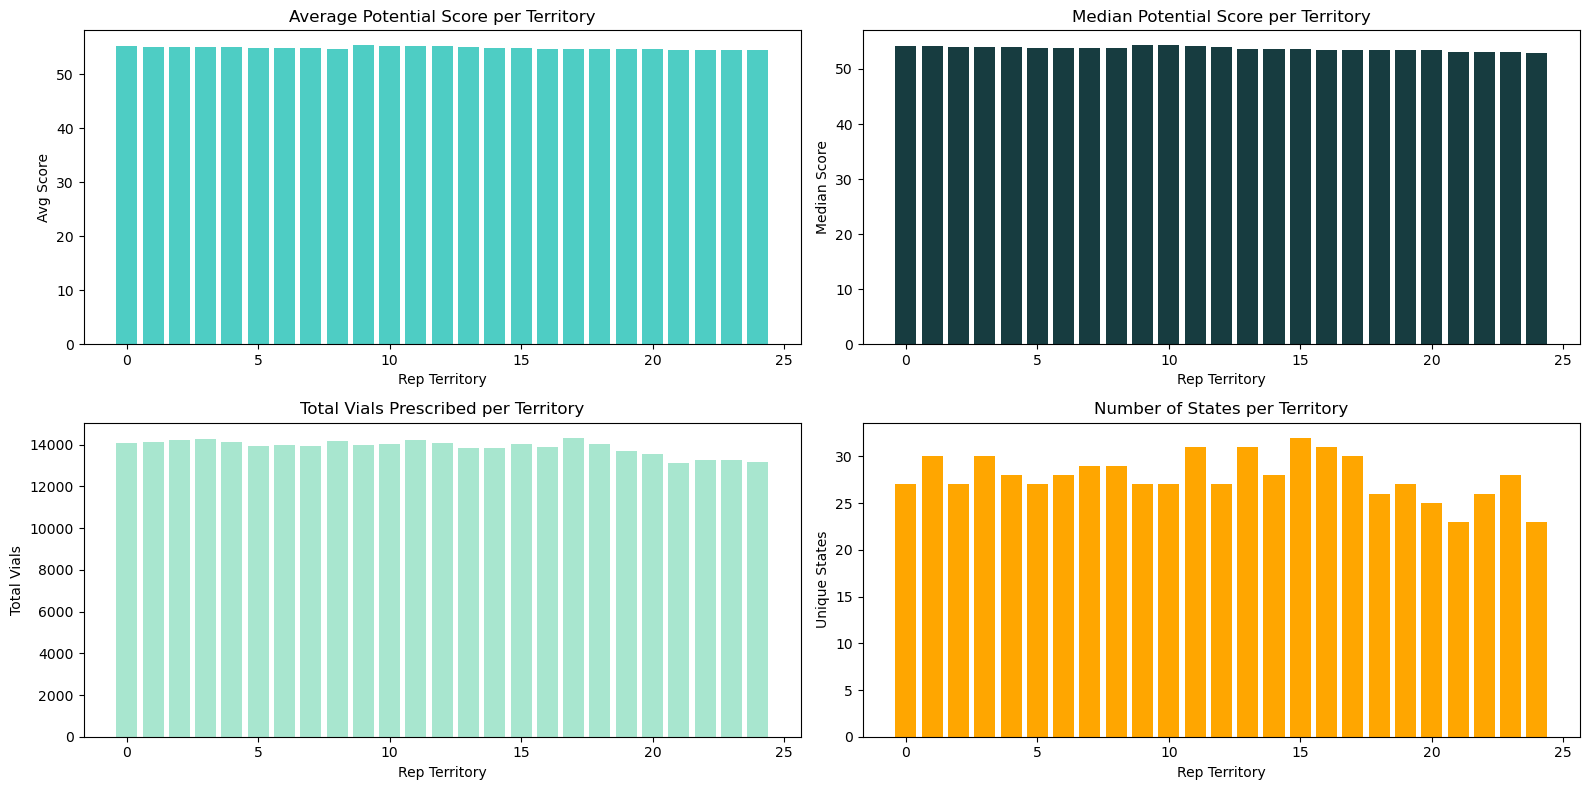

In [39]:

# --- Assign 25 territories such that each tier is distributed as equally as possible across reps ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_reps = 25

# First, get lists by tier, sorted by score descending (optional for deterministic assignment)
core = df_score[df_score['Tier'] == 'Tier_3_Core'].sort_values('Potential_Score', ascending=False)
priority = df_score[df_score['Tier'] == 'Tier_2_Priority'].sort_values('Potential_Score', ascending=False)
elite = df_score[df_score['Tier'] == 'Tier_1_Elite'].sort_values('Potential_Score', ascending=False)

# Helper: assign tiered list to reps in round-robin
def assign_reps(tier_df, rep_col='Rep_Territory'):
    n = len(tier_df)
    reps = np.arange(n_reps)
    assigned_reps = []
    for i, idx in enumerate(tier_df.index):
        assigned_reps.append(reps[i % n_reps])
    tier_df = tier_df.copy()
    tier_df[rep_col] = assigned_reps
    return tier_df

core_assigned = assign_reps(core)
priority_assigned = assign_reps(priority)
elite_assigned = assign_reps(elite)

# Combine and resort
df_reps = pd.concat([elite_assigned, priority_assigned, core_assigned], axis=0)
df_reps = df_reps.sort_values('Potential_Score', ascending=False).reset_index(drop=True)

# Sanity check: rep counts
rep_counts = df_reps['Rep_Territory'].value_counts().sort_index()
print("✓ Physician counts by rep territory:\n", rep_counts.to_string())

# --- Visualizations ---

territory_stats = (
    df_reps.groupby('Rep_Territory').agg(
        avg_score = ('Potential_Score', 'mean'),
        median_score = ('Potential_Score', 'median'),
        total_vials = ('Competitor Vials Prescribed Per Year', 'sum'),
        state_count = ('Organization State', lambda s: s.nunique())
    )
)

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Average score by rep
axs[0,0].bar(territory_stats.index, territory_stats['avg_score'], color="#4ECDC4")
axs[0,0].set_title("Average Potential Score per Territory")
axs[0,0].set_xlabel("Rep Territory")
axs[0,0].set_ylabel("Avg Score")

# Median score by rep
axs[0,1].bar(territory_stats.index, territory_stats['median_score'], color="#173C40")
axs[0,1].set_title("Median Potential Score per Territory")
axs[0,1].set_xlabel("Rep Territory")
axs[0,1].set_ylabel("Median Score")

# Total vials by rep
axs[1,0].bar(territory_stats.index, territory_stats['total_vials'], color="#A8E6CF")
axs[1,0].set_title("Total Vials Prescribed per Territory")
axs[1,0].set_xlabel("Rep Territory")
axs[1,0].set_ylabel("Total Vials")

# State counts by rep
axs[1,1].bar(territory_stats.index, territory_stats['state_count'], color="#ffa600")
axs[1,1].set_title("Number of States per Territory")
axs[1,1].set_xlabel("Rep Territory")
axs[1,1].set_ylabel("Unique States")

plt.tight_layout()
plt.show()




In [40]:
# --- US Map Visualization: Territory Assignments ---

import plotly.graph_objects as go
import plotly.express as px

# Create a color palette for 25 territories
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Generate 25 distinct colors using a continuous colormap
n_territories = 25
# Use HSV colormap which gives good color separation for many colors
colormap = cm.get_cmap('hsv')
colors = [colormap(i / n_territories) for i in range(n_territories)]
# Convert to hex
territory_colors = [mcolors.rgb2hex(c[:3]) for c in colors]

# Create a mapping of territory to color
territory_color_map = {i: territory_colors[i] for i in range(n_territories)}

# Count physicians by state and territory
state_territory_counts = df_reps.groupby(['Organization State', 'Rep_Territory']).size().reset_index(name='count')

# Find dominant territory for each state (territory with most physicians)
dominant_territory = state_territory_counts.loc[
    state_territory_counts.groupby('Organization State')['count'].idxmax()
][['Organization State', 'Rep_Territory']].set_index('Organization State')['Rep_Territory']

# Create a dataframe for mapping
state_data = pd.DataFrame({
    'State': dominant_territory.index,
    'Territory': dominant_territory.values
})

# Add territory color to each state
state_data['Color'] = state_data['Territory'].map(territory_color_map)

# Create a custom discrete color scale for 25 territories
# Generate a list of colors for each territory value (0-24)
import colorsys

def generate_distinct_colors(n):
    """Generate n visually distinct colors"""
    colors = []
    for i in range(n):
        hue = i / n
        saturation = 0.7 + (i % 3) * 0.1  # Vary saturation
        lightness = 0.5 + (i % 2) * 0.15  # Vary lightness
        rgb = colorsys.hls_to_rgb(hue, lightness, saturation)
        colors.append(f'rgb({int(rgb[0]*255)},{int(rgb[1]*255)},{int(rgb[2]*255)})')
    return colors

# Create color scale for 25 territories
territory_rgb_colors = generate_distinct_colors(n_territories)
# Create a custom colorscale list for plotly
# Format: [[0, 'color1'], [0.04, 'color1'], [0.04, 'color2'], [0.08, 'color2'], ...]
custom_colorscale = []
step = 1.0 / n_territories
for i, color in enumerate(territory_rgb_colors):
    custom_colorscale.append([i * step, color])
    custom_colorscale.append([(i + 1) * step, color])

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_data['State'],
    z=state_data['Territory'],
    locationmode='USA-states',
    colorscale=custom_colorscale,
    text=state_data['State'] + '<br>Territory: ' + state_data['Territory'].astype(str),
    hovertemplate='<b>%{text}</b><extra></extra>',
    colorbar=dict(
        title='Territory<br>Number',
        tickmode='linear',
        tick0=0,
        dtick=1,
        len=0.8,
        nticks=min(26, n_territories + 1)
    ),
    marker_line_color='white',
    marker_line_width=1,
    zmin=-0.5,
    zmax=n_territories - 0.5
))

fig.update_layout(
    title_text='Territory Assignments by State (Dominant Territory)<br><sub>Each territory has a distinct color</sub>',
    geo_scope='usa',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgb(243, 243, 243)',
        bgcolor='rgb(255, 255, 255)',
        showlakes=True,
        showland=True,
        subunitwidth=1,
        subunitcolor='white'
    ),
    height=700,
    width=1400
)

fig.show()

# Also create a summary table showing all territories active in each state
print("\n=== TERRITORY PRESENCE BY STATE ===")
print("(Showing all territories with physicians in each state)\n")

state_territory_summary = df_reps.groupby(['Organization State', 'Rep_Territory']).agg({
    'NPI': 'count',
    'Competitor Vials Prescribed Per Year': 'sum'
}).reset_index()
state_territory_summary.columns = ['State', 'Territory', 'Physician_Count', 'Total_Vials']

# Show top states with multiple territories
multi_territory_states = state_territory_summary.groupby('State')['Territory'].count()
multi_territory_states = multi_territory_states[multi_territory_states > 1].sort_values(ascending=False)

print(f"States with multiple territories: {len(multi_territory_states)}")
print("\nTop 10 states with most territories:")
for state in multi_territory_states.head(10).index:
    territories = state_territory_summary[state_territory_summary['State'] == state][['Territory', 'Physician_Count', 'Total_Vials']]
    print(f"\n{state}: {len(territories)} territories")
    print(territories.to_string(index=False))



/var/folders/c1/h9mwkj6j52997x_qfyk5t8hc0000gn/T/ipykernel_86887/4230139075.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.




=== TERRITORY PRESENCE BY STATE ===
(Showing all territories with physicians in each state)

States with multiple territories: 48

Top 10 states with most territories:

NY: 25 territories
 Territory  Physician_Count  Total_Vials
         0               12         2243
         1               12         2677
         2                6         1385
         3               13         2712
         4                3          458
         5                9         1687
         6               11         2318
         7               12         2443
         8                9         2078
         9                8         1499
        10                9         2072
        11                4          735
        12               10         1982
        13                5         1069
        14                8         1524
        15                7         1421
        16                9         2017
        17                8         1729
        18               10     

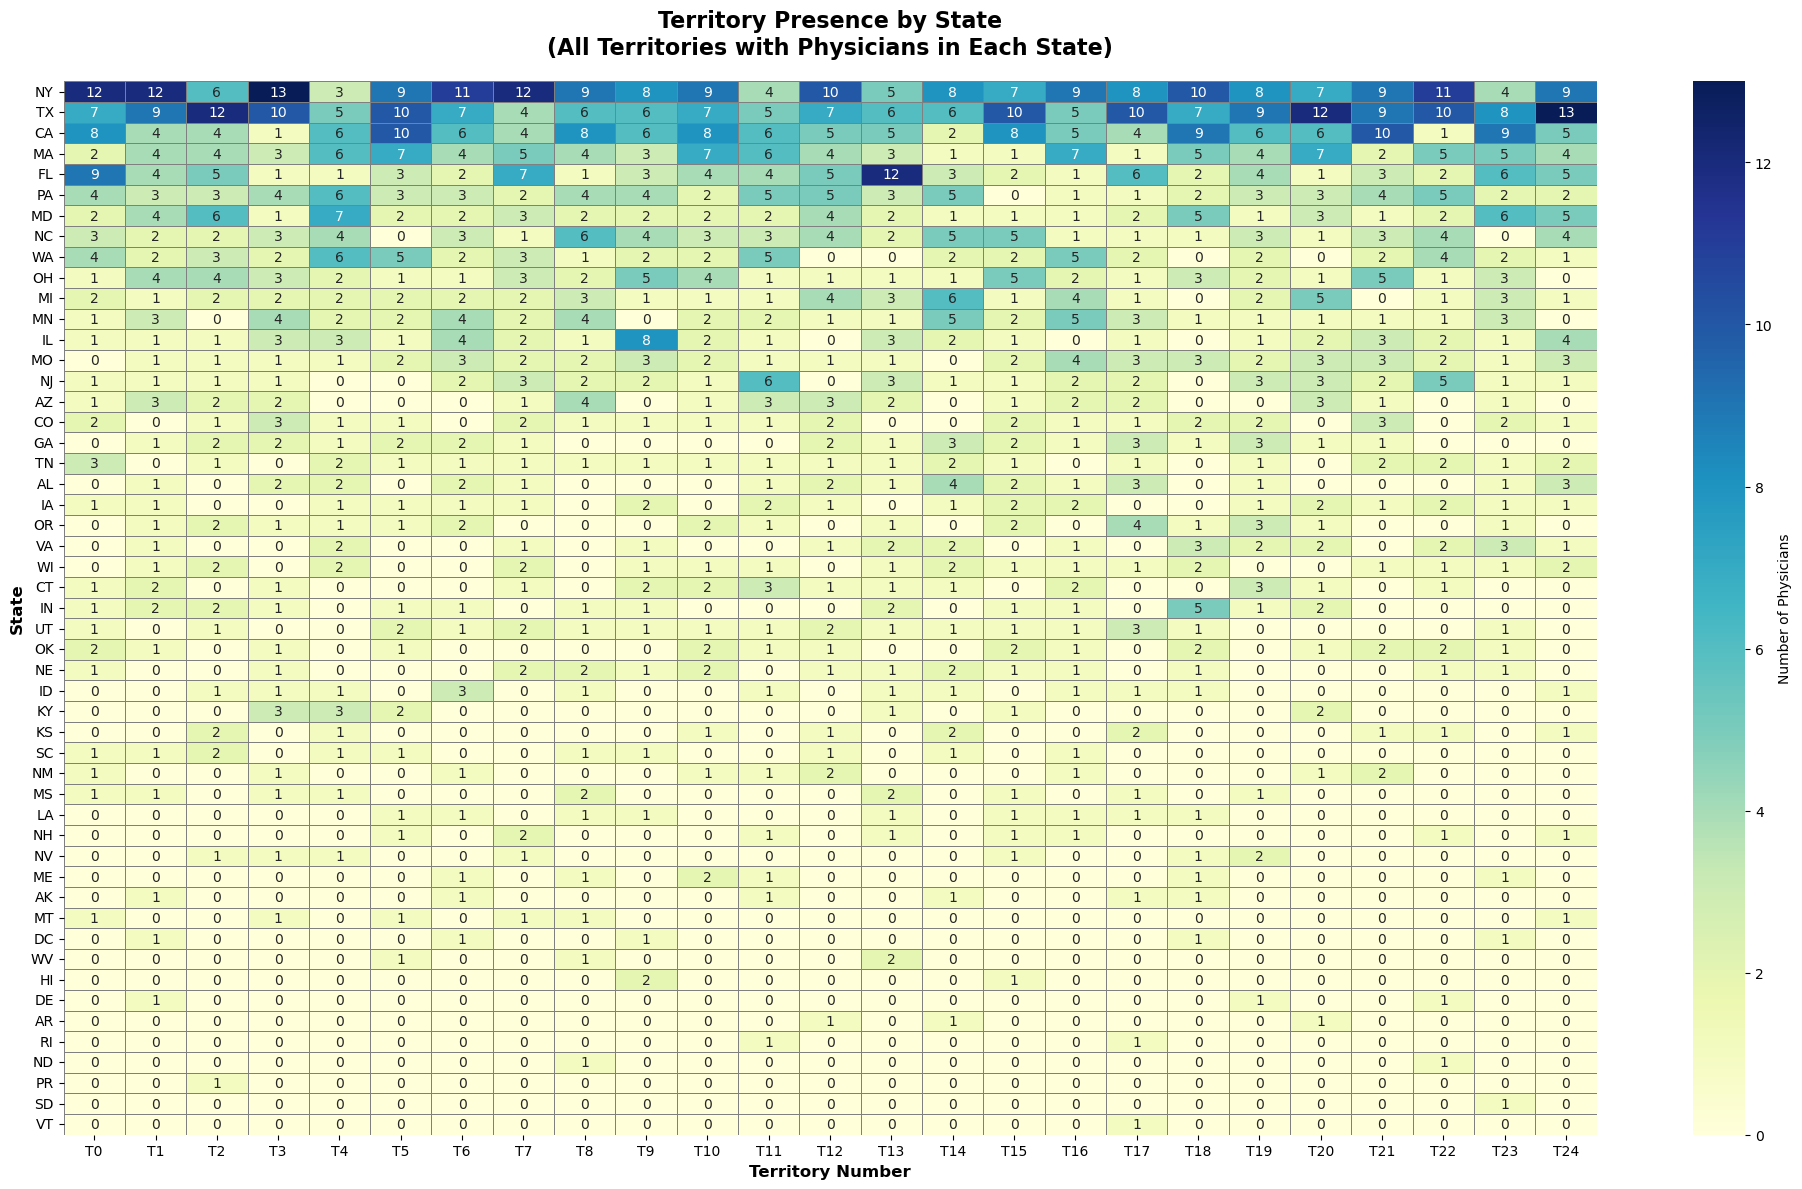

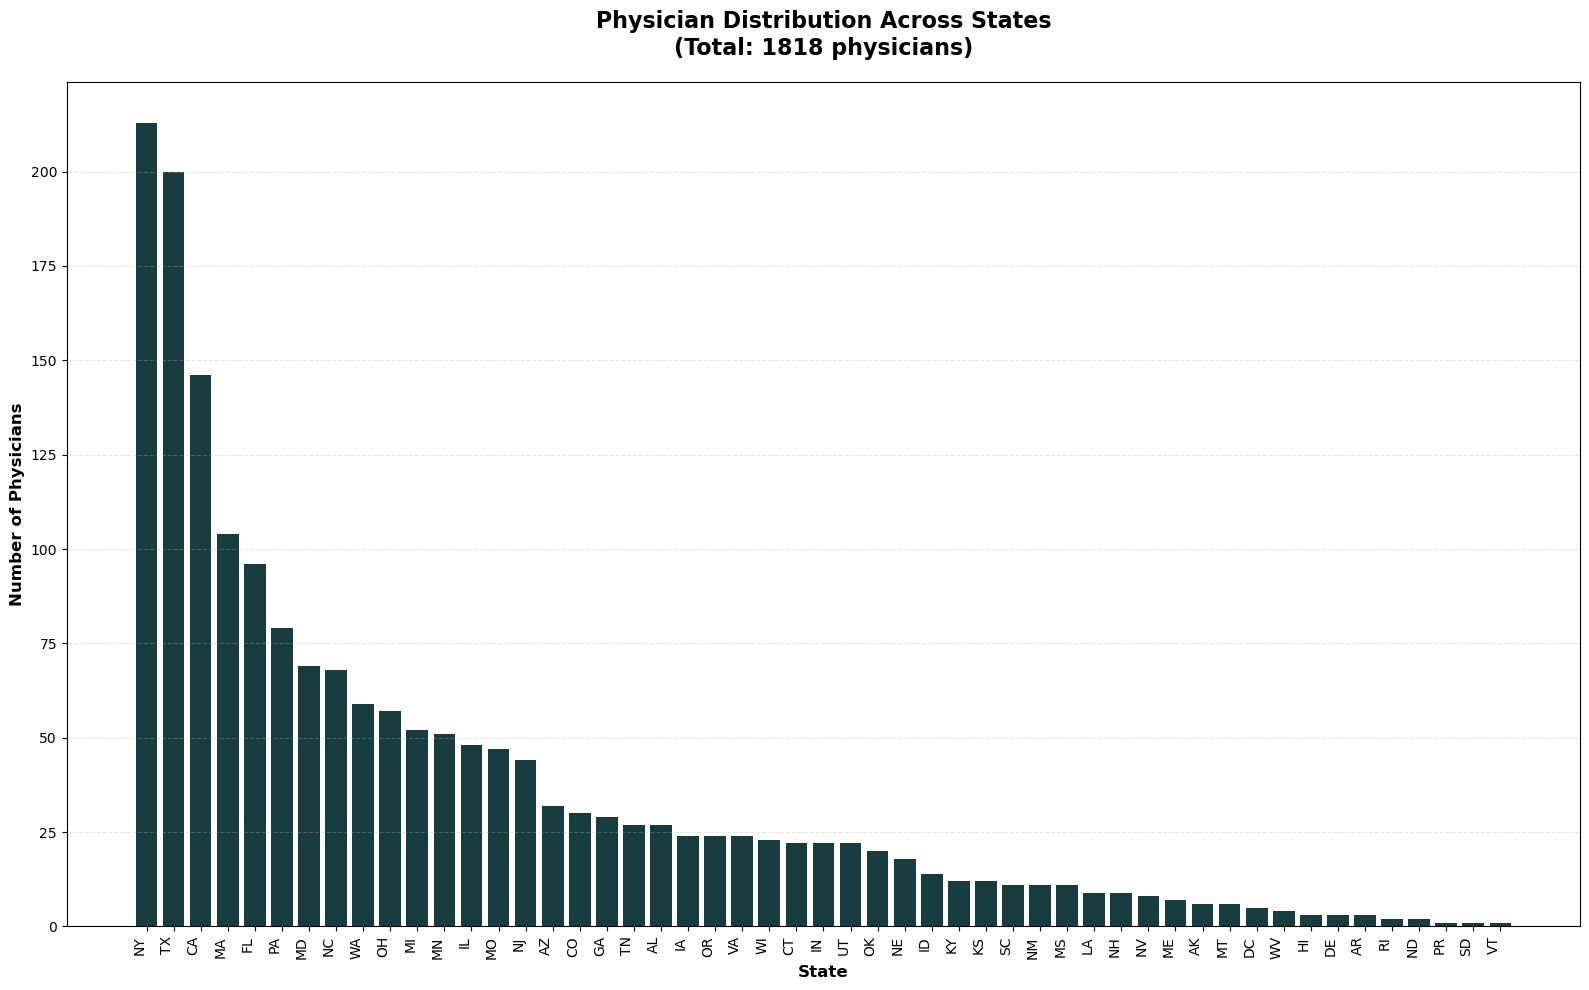


=== PHYSICIAN DISTRIBUTION SUMMARY ===

Total physicians: 1818
Total states with physicians: 51

Top 10 states by physician count:
  1. NY: 213 physicians (11.7%)
  2. TX: 200 physicians (11.0%)
  3. CA: 146 physicians (8.0%)
  4. MA: 104 physicians (5.7%)
  5. FL: 96 physicians (5.3%)
  6. PA: 79 physicians (4.3%)
  7. MD: 69 physicians (3.8%)
  8. NC: 68 physicians (3.7%)
  9. WA: 59 physicians (3.2%)
  10. OH: 57 physicians (3.1%)

=== TERRITORY DISTRIBUTION SUMMARY ===

Total states with physicians: 51
States with multiple territories: 48
Average territories per state: 13.67
Maximum territories in a single state: 25


In [41]:
# --- Territory Presence by State: Heatmap Visualization ---
# Shows all territories active in each state (not just dominant territory)

import seaborn as sns

# Create a pivot table: States as rows, Territories as columns, Physician counts as values
territory_pivot = df_reps.groupby(['Organization State', 'Rep_Territory']).size().unstack(fill_value=0)

# Sort states by total number of physicians (descending) - ensures heatmap is ordered by most physicians
state_physician_totals = territory_pivot.sum(axis=1).sort_values(ascending=False)
territory_pivot = territory_pivot.reindex(state_physician_totals.index)

# Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    territory_pivot,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar_kws={'label': 'Number of Physicians'},
    linewidths=0.5,
    linecolor='gray',
    xticklabels=[f'T{i}' for i in range(25)],
    yticklabels=True
)

plt.title('Territory Presence by State\n(All Territories with Physicians in Each State)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Territory Number', fontsize=12, fontweight='bold')
plt.ylabel('State', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Physician Distribution Across All States ---
# Show how the 1818 doctors are distributed across 50 states

# Count physicians by state
state_distribution = df_reps.groupby('Organization State').size().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(16, 10))
bars = plt.bar(range(len(state_distribution)), state_distribution.values, color='#173C40')
plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Number of Physicians', fontsize=12, fontweight='bold')
plt.title(f'Physician Distribution Across States\n(Total: {len(df_reps)} physicians)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(state_distribution)), state_distribution.index, rotation=90, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print summary
print(f"\n=== PHYSICIAN DISTRIBUTION SUMMARY ===\n")
print(f"Total physicians: {len(df_reps)}")
print(f"Total states with physicians: {len(state_distribution)}")
print(f"\nTop 10 states by physician count:")
for i, (state, count) in enumerate(state_distribution.head(10).items(), 1):
    pct = (count / len(df_reps)) * 100
    print(f"  {i}. {state}: {count} physicians ({pct:.1f}%)")

# Summary statistics
print("\n=== TERRITORY DISTRIBUTION SUMMARY ===\n")
print(f"Total states with physicians: {len(territory_pivot)}")
print(f"States with multiple territories: {(territory_pivot > 0).sum(axis=1).gt(1).sum()}")
print(f"Average territories per state: {(territory_pivot > 0).sum(axis=1).mean():.2f}")
print(f"Maximum territories in a single state: {(territory_pivot > 0).sum(axis=1).max()}")

